## Notebook for Applied Statistics Tasks
by David O'Sullivan

## Task 1: Permutations Combinations

Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

Would you accept two errors? Explain.

In [4]:
# Number of cups of Tea in toal 
n = 12

# Number of cups of tea with milk in first 
k = 6

## Step 1 - Probability of selecting 6 correct cups
The first step in this task is to calculate the probability of selecting exactly 6 correct cups from 12. Initially, we calculate the number of possible ways to select 6 cups, starting with 12 options and reducing for each selection. This gives us the total number of ordered selections, or "ways_ordered".

Since the order doesn't matter, we account for this by dividing by the number of ways to arrange 6 items, which gives the total number of combinations of 6 cups from 12.

To find the probability of guessing all 6 cups correctly, we divide the 1 favorable outcome (the correct selection) by the total number of combinations.

I initially did this manually but later found that Python's math.comb() provides a simpler way to compute combinations directly.

## Manual Way

In [9]:
ways_ordered = 12 * 11 * 10 * 9 * 8 * 7

no_shuffle = 6 * 5 * 4 * 3 * 2 * 1

# No. of combinations
no_combs = ways_ordered // no_shuffle

probability_exactly_6_correct = 1 / no_combs

probability_exactly_6_correct

0.0010822510822510823

## More efficient way - math.comb()

In [15]:
import math 
# Total number of ways to choose 6 cups out of 12
total_combinations = math.comb(12,6)

# Probability of selecting all 6 cups correctly 
prob_6_correct = 1 / total_combinations

prob_6_correct


0.0010822510822510823

## Step 2 - Probability of selecting 5 correct cup (1 error)

## Step 3 - Would we accept 2 errors?

## Task 2: numpy's Normal Distribution

The purpose of this task is to assess whether numpy.random.normal() properly generates normal values. To begin, I generated a sample of one hundred thousand values using the np.normal.random function with a mean of 10.0 and standard deviation 3.0.

Next, scipy.stats.shapiro() was used to check if the dataset is normally distributed however, it only works for sample sizes up to 5000 due to computational limits. There are two outputs from this test, the P-Value and the Test Statistic. For this Task the standard 0.05 is our significance level. If the P-Value is less than 0.05 then we can reject null hypothesis however, if P-value is greater then we fail to reject it. Below I added an IF statement to interpret the results and let me know once I run the code if I am going to reject null hypothesis or not. Confirming a dataset is normally distributed is extremely important before performing statistical analysis. Many tests have the assumption of normal distribution so the accuracy of the results is dependent on it.

The final part of the code involves generating a histogram of the data, calculating and overlaying the normal distribution PDF. The Normal Distribution is a symmetric, bell-shaped probability distribution defined by two parameters: the mean and standard deviation. Most data points cluster around the mean, while the tails represent the likelihood of values farther from the mean. 

np.linespace creates an array of evenly spaced numbers between a starting point and an ending point while norm.pdf calculates the height (density) of a normal distribution curve at specific points.

## References:

https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html

https://builtin.com/data-science/shapiro-wilk-test#:~:text=Shapiro%2DWilk%20Test%20Explained&text=It%20evaluates%20data%20from%20a,it%20isn't%20normally%20distributed.

https://docs.scipy.org/doc/scipy-1.12.0/reference/generated/scipy.stats.shapiro.html

https://pieriantraining.com/working-with-scipy-stats-norm-a-guide/#:~:text=In%20Python%2C%20we%20can%20use,scale%20is%20the%20standard%20deviation.

https://stackoverflow.com/questions/61408841/np-mean-and-np-std-of-norm-pdf

https://www.geeksforgeeks.org/numpy-linspace/

Shapiro Test Results:
Test Statistic: 0.9994725969267427
P-Value: 0.17446257752388045
Fail to reject the null hypothesis: Data is normally distributed.


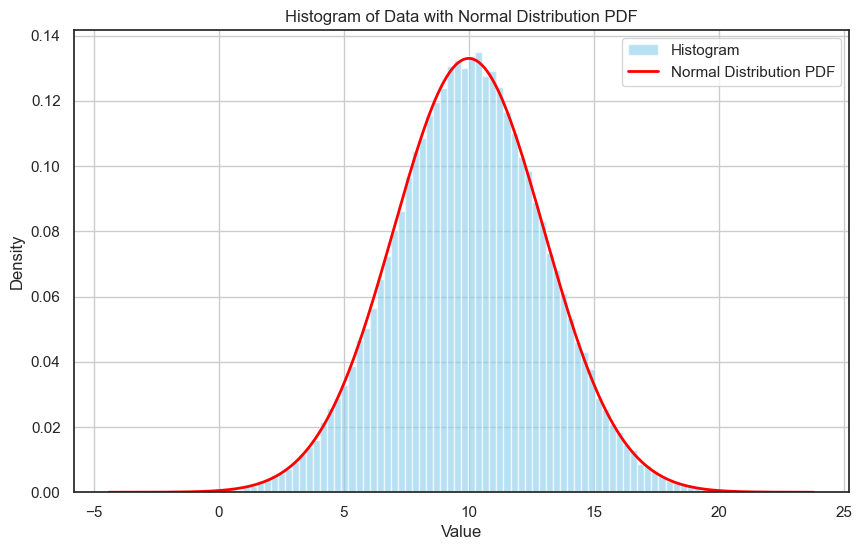

In [9]:
import numpy as np
from scipy.stats import shapiro, norm
import matplotlib.pyplot as plt

# Generate the data
mean = 10.0 
std_dev = 3.0 
n_samples = 100000

data = np.random.normal(loc=mean, scale=std_dev, size=n_samples)

# Test for normality using Shapiro test
statistic, p_value = shapiro(data[:5000])
print("Shapiro Test Results:")
print(f"Test Statistic: {statistic}")
print(f"P-Value: {p_value}")

# Interpretation of results
if p_value > 0.05:
    print("Fail to reject the null hypothesis: Data is normally distributed.")
else:
    print("Reject the null hypothesis: Data may not be normally distributed.")

# Plot the histogram 
plt.figure(figsize=(10, 6))
plt.hist(data, bins=100, density=True, alpha=0.6, color='skyblue', label='Histogram')

# Generate the corresponding normal distribution PDF (Probability Density Function)
x = np.linspace(min(data), max(data), 1000)
y = norm.pdf(x, mean, std_dev)

# Plot the normal distribution curve
plt.plot(x, y, color='red', linewidth=2, label='Normal Distribution PDF')

# Add labels
plt.title("Histogram of Data with Normal Distribution PDF")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


## Task 3: t-Test Calculation

#### Paired t-Test

For this task the first step is to decide which type of t-Test to do. As mentioned in my project.ipynb there are three main types of t-Tests:

One-Sample t-Test: Used when comparing the mean of a single sample to a known value or population mean. For example, you might use this test to evaluate whether the average test score of a class is significantly different from a national average.

Independent Samples t-Test: Applied when comparing the means of two independent groups to determine if they differ significantly. For instance, this test can assess whether males and females perform differently on a specific task.

Paired Samples t-Test: Used to compare the means of two related or dependent groups, such as measurements taken from the same individuals at two different times (e.g., before and after an intervention).

The dataset contains resting heart rates for patients before and after embarking on a two-week exercise program. Based off of the information above this best suits a Paired Samples t-Test so this is the test we will execute below.

#### Results Discussion

It is very positive to see that the results for the manual paired t-Test are the same as the t-Test conducted using scipy.stats. The resources below made this very straightforward. Being able to do the t-Test manually is helpful to understand how it works and then having libraries like scipy.stats is convenient in terms of efficiency. The scipy.stats syntax is self-explanatory so below is a breakdown of the steps for the manual calculation.

Step 1: Calculate Means - The t-Test compares the two means to see if there is a significance difference between them.

Step 2: Count the Number of Paired Samples - This is where we see how many data points are in each column, this is used to calculate standard error (sed) and degrees of freedom (df)

Step 3: Sum Squared Difference Between Observations - This step calculates the sum squared difference between each pair of Before and After Values

Step 4: Calculate Standard Deviation of the Difference - The standard deviation is needed as it tells us how spread out the differences are and is used to calculate the standard error.

Step 5: Calculate the Standar Error of the Differences Between the Means - The standard error shows how much of the mean difference is expected to vary by chance.

Step 6: Calculate the t-Statistic & Degrees of Freedom - In this step we put everything together to get the required results.


#### References for Task 3

https://www.geeksforgeeks.org/how-to-conduct-a-paired-samples-t-test-in-python/

https://www.youtube.com/watch?v=sCbslydajOM

https://www.cuemath.com/questions/how-to-find-the-standard-deviation-of-the-difference-between-two-means/

https://www.investopedia.com/terms/s/standard-error.asp

#### Manual Paired t-Test

https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/

In [10]:
import numpy as np

# calculate means
mean1, mean2 = np.mean(Before), np.mean(After)

# number of paired samples
n = len(Before)

# sum squared difference between observations
d1 = sum([(Before[i] - After[i])**2 for i in range(n)])

# sum difference between observations
d2 = sum([Before[i] - After[i] for i in range(n)])

# standard deviation of the difference between means
sd = np.sqrt((d1 - (d2**2 / n)) / (n - 1))

# standard error of the difference between the means
sed = sd / np.sqrt(n)

# calculate the t statistic
t_stat = (mean1 - mean2) / sed

# degrees of freedom
df = n - 1

# output the results
print(f"t-statistic: {t_stat}")
print(f"degrees of freedom: {df}")


t-statistic: 1.3372274824806385
degrees of freedom: 9


#### scipy.stats Paired t-Test

https://www.statology.org/paired-samples-t-test-python/

In [9]:
import pandas as pd
import scipy.stats as stats

Before = [63, 68, 70, 64, 74, 67, 70, 57, 66, 65]

After = [64, 64, 68, 64, 73, 70, 72, 54, 61, 63]

stats.ttest_rel(Before, After)

TtestResult(statistic=1.337227482480628, pvalue=0.21396011317404623, df=9)

## Task 4: ANOVA

#### Steps for task (Will be removed at later stage)

1. Create variables no_typre_ii & iterations
2. Use loop and numpy.random.normal to generate 3 samples and provide SD and means.
3. Perform one way anova 

#### Explaining the Code

For this task I first started by importing the necessary libraries, Pandas and scipy.stats. Next up I needed to create variables no_type_ii & iterations.

The next section was quite difficult but was made much easier thanks to the resources below. Here I ran a for loop combined with the range function as well as np.random.normal. np.random.normal(loc=0.0, scale=1.0, size=None) generates random samples from a normal distribution with a specified mean, standard deviation, and output shape. I later found a reference on stackoverflow which showed me how to execute numpy.random.normal (excluding the loop) along with f_oneway. In my project when performing ANOVA I executed OLS-based ANOVA and planned to do so here until I came across f_oneway where the syntax was more efficient. The final part of the code is an if statement to count the number of times a type ii error occurs and then calculated the probability by dividing the type ii errors by the iterations.


#### References

numpy.random.normal : https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html

loop combined with random.normal : https://stackoverflow.com/questions/69968705/trying-to-iterate-np-random-normal-over-a-list-with-a-for-loop

Range Loop : https://www.w3schools.com/python/gloss_python_for_range.asp

f_oneway w/ numpy.random.normal : https://stackoverflow.com/questions/63662215/one-way-anova-using-statsmodels




In [6]:
# Import Libraries
import numpy as np
from scipy.stats import f_oneway

In [18]:
# Create Varialbes 
no_type_ii = 0

iterations = 10000

# Loop
for i in range(iterations):
    sample1 = np.random.normal(loc=4.9, scale=0.1, size=100)
    sample2 = np.random.normal(loc=5.0, scale=0.1, size=100)
    sample3 = np.random.normal(loc=5.1, scale=0.1, size=100)

# Perform one-way ANOVA
f_oneway(sample1, sample2, sample3)

if p_value > 0.05:
    no_type_ii += 1

# Probability of committing a Type II error
prob_type_ii = no_type_ii / iterations

prob_type_ii

0.0